In [18]:
import pickle, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import spatial
import random

In [2]:
data_path = '../../skipthoughts_files'
data_list = [item for item in os.listdir(data_path) if '.p' in item and '.txt' in item]

In [3]:
data_list

['Edgar Allan Poe___The Cask of Amontillado.txt_vecs.p',
 'Mary Shelley___Frankenstein.txt_vecs.p',
 'Charles Dickens___A Tale of Two Cities.txt_vecs.p',
 "Lewis Carroll___Alice's Adventures in Wonderland.txt_vecs.p",
 'Sir Arthur Conan Doyle___A Study In Scarlet.txt_vecs.p',
 'Jack London___White Fang.txt_vecs.p',
 'Joseph Conrad___Heart of Darkness, Version 1.txt_vecs.p',
 'Oscar Wilde___The Picture of Dorian Gray.txt_vecs.p',
 'Bram Stoker___Dracula.txt_vecs.p']

### Cross entropy

In [4]:
def calc_kl(p, q):
    return sum([p[i]*(np.log2(p[i]/q[i])) for i in range(len(p))])

In [5]:
def calc_ent(p):
    return -sum([p[i]*(np.log2(p[i])) for i in range(len(p)) if p[i] != 0.0 ])

In [6]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

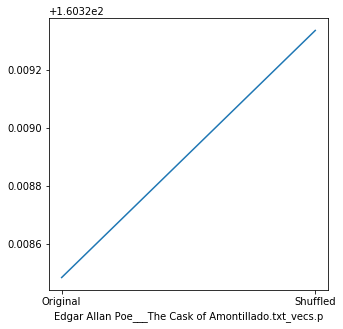

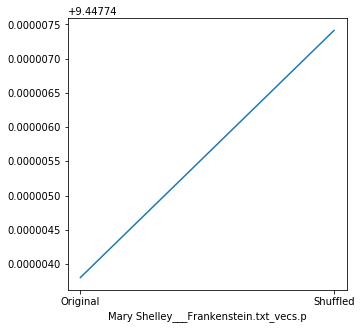

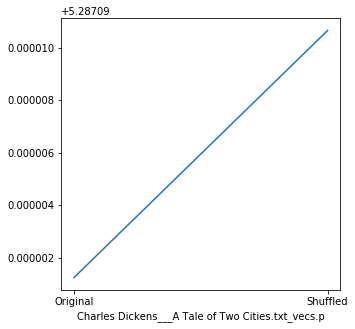

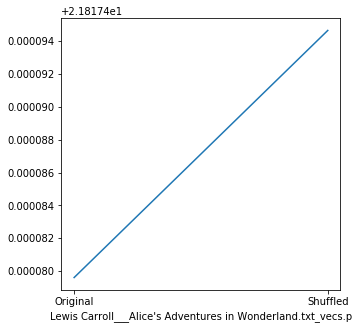

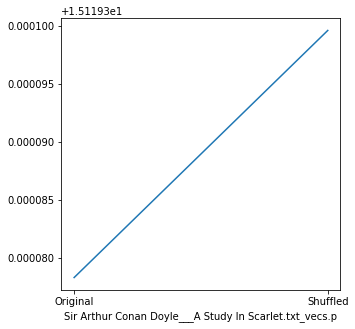

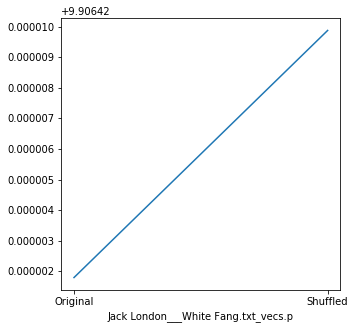

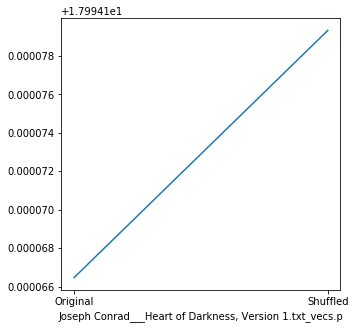

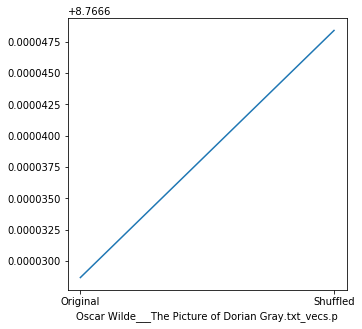

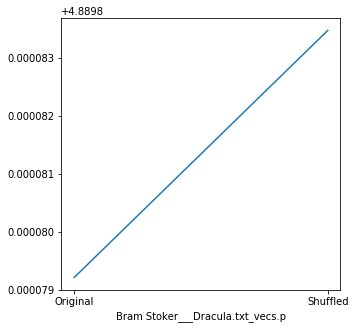

In [36]:
for item in data_list:
    plt.figure(figsize = (5,5))
    dist_list = []
    dist_list_r = []
    vec = pickle.load(open(os.path.join(data_path, item), 'rb'))
    vec = softmax(vec)
    
    i = 0
    step = int(vec.shape[0]/vec.shape[0])
    while i < vec.shape[0] - step:
        dist_list.append(calc_ent(vec[i]) + calc_kl(vec[i], vec[i+step]))
        i += step
    vec_r = np.asarray(random.sample(vec, vec.shape[0]))
    i = 0
    while i < vec_r.shape[0] - step:
        dist_list_r.append(calc_ent(vec[i]) + calc_kl(vec_r[i], vec_r[i+step]))
        i += step
    plt.plot(range(2), [np.average(dist_list), np.average(dist_list_r)])
    plt.xticks(range(2), ['Original', 'Shuffled'])
    plt.xlabel(item)